In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math
from scipy.stats.mstats import gmean
from scipy.stats import gamma, poisson, linregress, beta, norm, lognorm
from scipy import optimize
import time
import random
import pickle as pkl
from cratrcountr import *
%matplotlib inline

In [4]:
t1 = time.time()
N_array = np.logspace(-2, 8, 3000)
if False:
    error_bar_matrix = np.array([
        error_bar_log_N(N, n_points=1000000, log_spacing=True) 
        for N in N_array
    ])
    with open('saved/error_bar_matrix.pkl', 'wb') as f:
        pkl.dump(error_bar_matrix, f)
else:
    with open('saved/error_bar_matrix.pkl', 'rb') as f:
        error_bar_matrix = pkl.load(f)
t2 = time.time()
print(format_runtime(t2 - t1))

0.00095 seconds


In [5]:
t1 = time.time()
N_array = np.logspace(-2, 8, 3000)
if False:
    linear_error_bar_matrix = np.array([
        error_bar_linear_N(N, n_points=1000000, log_spacing=False) 
        for N in N_array
    ])
    with open('saved/linear_error_bar_matrix.pkl', 'wb') as f:
        pkl.dump(linear_error_bar_matrix, f)
else:
    with open('saved/linear_error_bar_matrix.pkl', 'rb') as f:
        linear_error_bar_matrix = pkl.load(f)
t2 = time.time()
print(format_runtime(t2 - t1))

0.00127 seconds


In [6]:
t1 = time.time()
N_array = np.logspace(-2, 8, 3000)
if False:
    auto_log_error_bar_matrix = np.array([
        error_bar_N(
            N, n_points=1000000, log_spacing=True, kind='auto log'
        ) 
        for N in N_array
    ])
    with open('saved/auto_log_error_bar_matrix.pkl', 'wb') as f:
        pkl.dump(auto_log_error_bar_matrix, f)
else:
    with open('saved/auto_log_error_bar_matrix.pkl', 'rb') as f:
        auto_log_error_bar_matrix = pkl.load(f)
t2 = time.time()
print(format_runtime(t2 - t1))

0.00097 seconds


In [7]:
X = np.log10(N_array)
Y_lower = np.log10(error_bar_matrix[:, 0])
Y_upper = np.log10(error_bar_matrix[:, 1])

inc = 0.1
edges = np.concat([
    np.arange(-2, 1 + inc, inc), np.array([2, 3, 4, 8])
])
lower_PPFit = get_PPFit(X, Y_lower, edges, polynomial_degree_7)
upper_PPFit = get_PPFit(X, Y_upper, edges, polynomial_degree_7)

(-2e-06, 2e-06)

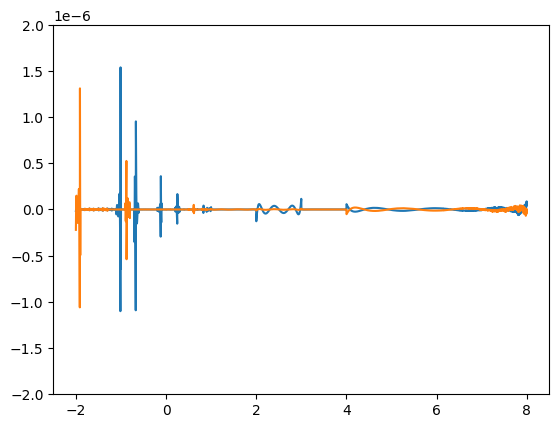

In [8]:
plt.plot(X, Y_lower - lower_PPFit.apply(X))
plt.plot(X, Y_upper - upper_PPFit.apply(X))
plt.ylim([-2E-6, 2E-6])

In [9]:
save_PPFit(lower_PPFit, 'saved/lower_PPFit')
save_PPFit(upper_PPFit, 'saved/upper_PPFit')

In [10]:
X = np.log10(N_array)
Y_lower_linear = np.log10(linear_error_bar_matrix[:, 0])
Y_upper_linear = np.log10(linear_error_bar_matrix[:, 1])

inc = 0.1
edges = np.concat([
    np.arange(-2, 1 + inc, inc), np.array([2, 3, 4, 8])
])
lower_PPFit_linear = get_PPFit(
    X, Y_lower_linear, edges, polynomial_degree_7
)
upper_PPFit_linear = get_PPFit(
    X, Y_upper_linear, edges, polynomial_degree_7
)

(-2e-06, 2e-06)

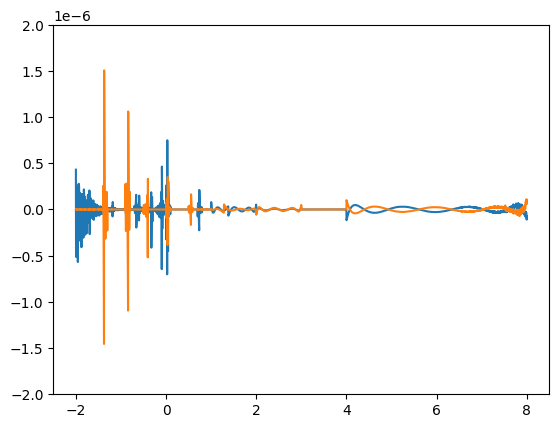

In [11]:
plt.plot(X, Y_lower_linear - lower_PPFit_linear.apply(X))
plt.plot(X, Y_upper_linear - upper_PPFit_linear.apply(X))
plt.ylim([-2E-6, 2E-6])

In [12]:
save_PPFit(lower_PPFit_linear, 'saved/lower_PPFit_linear')
save_PPFit(upper_PPFit_linear, 'saved/upper_PPFit_linear')

In [13]:
X = np.log10(N_array)
Y_val_auto_log = auto_log_error_bar_matrix[:, 0]
Y_lower_auto_log = np.log10(auto_log_error_bar_matrix[:, 1])
Y_upper_auto_log = np.log10(auto_log_error_bar_matrix[:, 2])

inc = 0.5
edges = np.concat([
    np.arange(-2, 1 + inc, inc), np.array([3, 8])
])
val_PPFit_auto_log = get_PPFit(
    X, Y_val_auto_log, edges, polynomial_degree_7
)
lower_PPFit_auto_log = get_PPFit(
    X, Y_lower_auto_log, edges, polynomial_degree_7
)
upper_PPFit_auto_log = get_PPFit(
    X, Y_upper_auto_log, edges, polynomial_degree_7
)

(-2e-06, 2e-06)

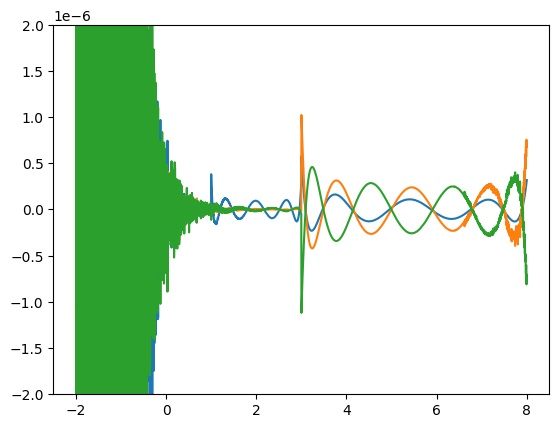

In [14]:
plt.plot(X, Y_val_auto_log - val_PPFit_auto_log.apply(X))
plt.plot(X, Y_lower_auto_log - lower_PPFit_auto_log.apply(X))
plt.plot(X, Y_upper_auto_log - upper_PPFit_auto_log.apply(X))
plt.ylim([-2E-6, 2E-6])

In [15]:
save_PPFit(val_PPFit_auto_log, 'saved/val_PPFit_auto_log')
save_PPFit(lower_PPFit_auto_log, 'saved/lower_PPFit_auto_log')
save_PPFit(upper_PPFit_auto_log, 'saved/upper_PPFit_auto_log')

Calculate and save the N = 0 values

In [16]:
_X0, _P0 = true_error_pdf_XP(0, n_points=1000000)
_C0 = cumulative_trapezoid(_P0, _X0, initial=0)
_C0 = _C0 / _C0.max()
N_0_upper = np.interp(2 * p_1_sigma - 1, _C0, _X0)

left, N_0_upper_linear = error_bar_N(
    0, n_points=1000000, kind='linear'
)

N0_percentile_low = gamma.ppf(1 - p_1_sigma, 0 + 1)
N0_median = gamma.ppf(0.5, 0 + 1)
N0_percentile_high = gamma.ppf(p_1_sigma, 0 + 1)

N0_median_lower = N0_median - N0_percentile_low
N0_median_upper = N0_percentile_high - N0_median

N_0_dict = {
    'log' : (None, None, N_0_upper),
    'auto log' : (None, None, N_0_upper),
    'linear' : (0, None, N_0_upper_linear),
    'median' : (N0_median, N0_median_lower, N0_median_upper),
    'mean' : (1, 1, 2),
    'sqrt(n)' : (None, None, None)
}

pd.DataFrame(N_0_dict).to_csv('saved/N_0_dict.csv')